In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [8]:
%%time
data=pd.read_excel(r"C:\Users\user\Desktop\Data sets\Online Retail.xlsx")

Wall time: 2min 20s


In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
data.shape

(541909, 8)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
np.sum(data.isnull())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],format="%d/%m/%Y %H:%M").dt.date

In [14]:
data=data[pd.notnull(data['CustomerID'])]

In [15]:
np.sum(data.isnull())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
data=data[(data['Quantity']>0)]

In [17]:
data['Total_Sales']=data['Quantity']*data['UnitPrice']

In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [19]:
#necessary_columns=data[['CustomerID','Total_Sales','InvoiceDate']]

In [20]:
#necessary_columns['CustomerID'].nunique()

NameError: name 'necessary_columns' is not defined

In [21]:
last_order_date=data['InvoiceDate'].max()
print(last_order_date)
print("---------------")
print(data[(data['CustomerID']==12346)].sum())

2011-12-09
---------------
InvoiceNo                              541431
StockCode                               23166
Description    MEDIUM CERAMIC TOP STORAGE JAR
Quantity                                74215
InvoiceDate                        2011-01-18
UnitPrice                                1.04
CustomerID                              12346
Country                        United Kingdom
Total_Sales                           77183.6
dtype: object


In [22]:
import lifetimes

In [23]:
from lifetimes.plotting import*
from lifetimes.utils import*

In [24]:
data = summary_data_from_transaction_data(data, 'CustomerID', 'InvoiceDate', monetary_value_col='Total_Sales', observation_period_end='2011-12-9')
data.reset_index().head()

,CustomerID,frequency,recency,T,monetary_value
0,12346.0,0.0,0.0,325.0,0.000000
1,12347.0,6.0,365.0,367.0,599.701667
2,12348.0,3.0,283.0,358.0,301.480000
3,12349.0,0.0,0.0,18.0,0.000000
4,12350.0,0.0,0.0,310.0,0.000000


count    4339.000000
mean        2.864024
std         5.952745
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64

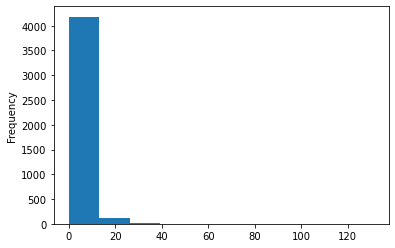

In [25]:
data['frequency'].plot(kind='hist')
data['frequency'].describe()


In [26]:
one_time_buyers = round(sum(data['frequency'] == 0)/float(len(data))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

Percentage of customers purchase the item only once: 35.7 %


In [27]:
sum(data['frequency']==0)/float(len(data))*(100),

(35.69946992394561,)

# Frequency/Recency Analysis Using the BG/NBD Model

In [28]:
from lifetimes import BetaGeoFitter
bgf=BetaGeoFitter()
bgf.fit(data['frequency'],data['recency'],data['T'])

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>

In [29]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.826433,0.026780,0.773944,0.878922
alpha,68.890678,2.611055,63.773011,74.008345
a,0.003443,0.010347,-0.016837,0.023722
b,6.749363,22.412933,-37.179985,50.678711


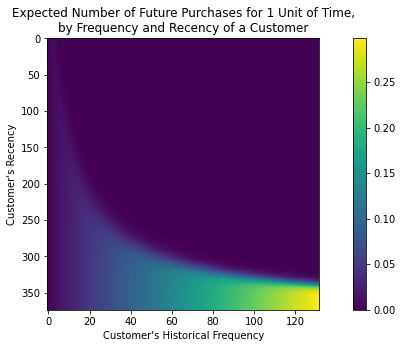

In [30]:
from lifetimes.plotting import plot_frequency_recency_matrix
plt.figure(figsize=(12,5))
plot_frequency_recency_matrix(bgf)

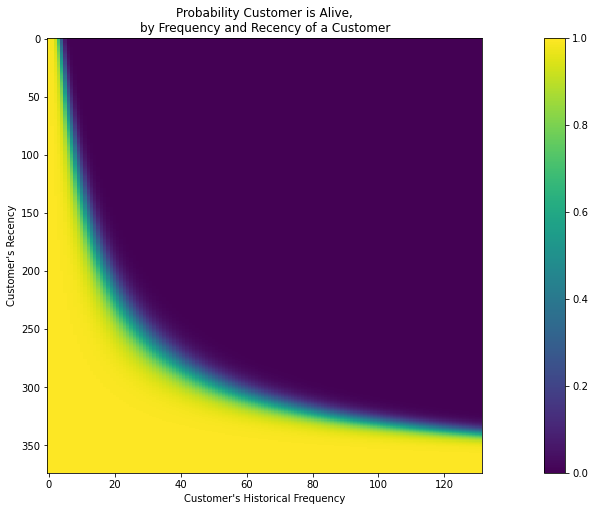

In [31]:
from lifetimes.plotting import plot_probability_alive_matrix
plt.figure(figsize=(22,8))
plot_probability_alive_matrix(bgf)

In [32]:
t=10
data['pred_num_tsn']= round(bgf.conditional_expected_number_of_purchases_up_to_time(t,data['frequency'],data['recency'],data['T']),1)
#data.sort_values(by='pred_num_tsn',)

In [33]:
data.sort_values(by='pred_num_tsn', ascending=False).head(10).reset_index()

,CustomerID,frequency,recency,T,monetary_value,pred_num_tsn
0,14911.0,131.0,372.0,373.0,1093.661679,3.0
1,12748.0,113.0,373.0,373.0,298.360885,2.6
2,17841.0,111.0,372.0,373.0,364.452162,2.5
3,15311.0,89.0,373.0,373.0,677.729438,2.0
4,14606.0,88.0,372.0,373.0,135.890114,2.0
5,12971.0,70.0,369.0,372.0,159.211286,1.6
6,13089.0,65.0,367.0,369.0,893.714308,1.5
7,13798.0,52.0,371.0,372.0,706.650962,1.2
8,14527.0,53.0,367.0,369.0,155.016415,1.2
9,16422.0,47.0,352.0,369.0,702.472340,1.1


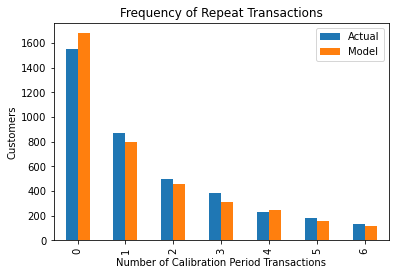

In [34]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [36]:
#Customer's future transaction prediction for next 10 days

t = 10
individual = data.loc[14911]
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])

#OBSERVATION: Our model predicts that customer 14911’s future transaction is appx 3 in 10 days.

2.9830238639043056

In [37]:
#Check if there is correlation between monetary value and frequency in order to use gamma gamma model for CLV calculation by pearson coeff.
data[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.046161
frequency,0.046161,1.000000


In [38]:
#Shortlist customers who had at least one repeat purchase with the company. 
shortlisted_customers = data[data['frequency']>0]
print(shortlisted_customers.head().reset_index())
print("-----------------------------------------")
print("The Number of Returning Customers are: ",len(shortlisted_customers))

   CustomerID  frequency  recency      T  monetary_value  pred_num_tsn
0     12347.0        6.0    365.0  367.0      599.701667           0.2
1     12348.0        3.0    283.0  358.0      301.480000           0.1
2     12352.0        6.0    260.0  296.0      368.256667           0.2
3     12356.0        2.0    303.0  325.0      269.905000           0.1
4     12358.0        1.0    149.0  150.0      683.200000           0.1
-----------------------------------------
The Number of Returning Customers are:  2790


In [39]:
#Train gamma-gamma model by taking into account the monetary_value.
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(shortlisted_customers['frequency'],
        shortlisted_customers['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [40]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,2.103523,0.111998,1.884007,2.323039
q,3.449907,0.139042,3.177385,3.722429
v,485.570938,42.595555,402.083650,569.058225


In [41]:
#After applying Gamma-Gamma model, now we can estimate average transaction value for each customer. 
print(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']
    ).head(10))

CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
12352.0    376.166864
12353.0    416.917667
12354.0    416.917667
12355.0    416.917667
12356.0    324.008941
dtype: float64


In [42]:
data['pred_txn_value'] = round(ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']), 2)
data.reset_index().head()

,CustomerID,frequency,recency,T,monetary_value,pred_num_tsn,pred_txn_value
0,12346.0,0.0,0.0,325.0,0.000000,0.0,416.92
1,12347.0,6.0,365.0,367.0,599.701667,0.2,569.99
2,12348.0,3.0,283.0,358.0,301.480000,0.1,333.76
3,12349.0,0.0,0.0,18.0,0.000000,0.1,416.92
4,12350.0,0.0,0.0,310.0,0.000000,0.0,416.92


In [43]:
data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    data['frequency'],
    data['recency'],
    data['T'],
    data['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)


data.sort_values(by='CLV', ascending=False).head(10).reset_index()

,CustomerID,frequency,recency,T,monetary_value,pred_num_tsn,pred_txn_value,CLV
0,14646.0,44.0,353.0,354.0,6366.705909,1.1,6213.28,222128.93
1,18102.0,25.0,367.0,367.0,9349.477200,0.6,8951.86,178895.33
2,16446.0,1.0,205.0,205.0,168469.600000,0.1,78051.29,175531.47
3,17450.0,26.0,359.0,367.0,7404.690385,0.6,7105.09,147476.62
4,14096.0,16.0,97.0,101.0,4071.434375,1.0,3823.47,127589.20
5,14911.0,131.0,372.0,373.0,1093.661679,3.0,1087.70,109442.13
6,12415.0,15.0,313.0,337.0,7860.210000,0.4,7323.92,96290.23
7,14156.0,42.0,362.0,371.0,2787.081667,1.0,2723.13,89410.33
8,17511.0,27.0,371.0,373.0,3305.060741,0.6,3185.63,67660.41
9,16029.0,38.0,335.0,373.0,2034.808421,0.9,1986.70,58729.62


In [45]:

#Calculate Customer Lifetime Value
data['CLV'] = round(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    data['frequency'],
    data['recency'],
    data['T'],
    data['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
), 2)

data.drop(data.iloc[:, 0:6], inplace=True, axis=1)

data.sort_values(by='CLV', ascending=False).head(10).reset_index()

,CustomerID,CLV
0,14646.0,222128.93
1,18102.0,178895.33
2,16446.0,175531.47
3,17450.0,147476.62
4,14096.0,127589.20
5,14911.0,109442.13
6,12415.0,96290.23
7,14156.0,89410.33
8,17511.0,67660.41
9,16029.0,58729.62
